# Twitter-US-Airlines-Sentiment

The following notebook demonstrate how to perform sentiment analysis using [ULMFiT](https://arxiv.org/abs/1801.06146) on twiter us airlines data set taken from [kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) competition.

## Sentiment Analysis

Sentiment analysis is a Natural Language Processing (NLP) problem which aims to classify what is the sentiment associated with a given inputed text. 

## ULMFiT 

ULMFit as a language model which was developed with insperation from inductive transfer learning which is prevelant in computer vision IMAGENET. The basic idea is that a language model shouldn't have to relearn for each task teh basic foundations of a given language (i.e. what is a valid word). Therefore, ULMFit was trained on a large corpus in order to learn language and then we finetune the model for our specific task.

# Data Analysis

In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
# from sklearn.cross_validation import train_test_split
import numpy

In [2]:
Tweet= pandas.read_csv("./Tweets/Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [4]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [5]:
Mood_count=Tweet['airline_sentiment'].value_counts()

Text(0.5, 1.0, 'Count of Moods')

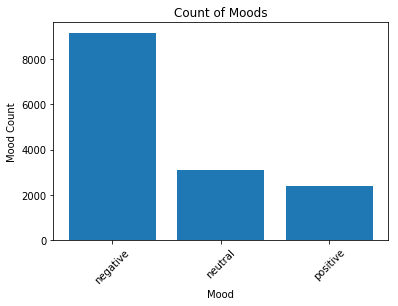

In [6]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [7]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

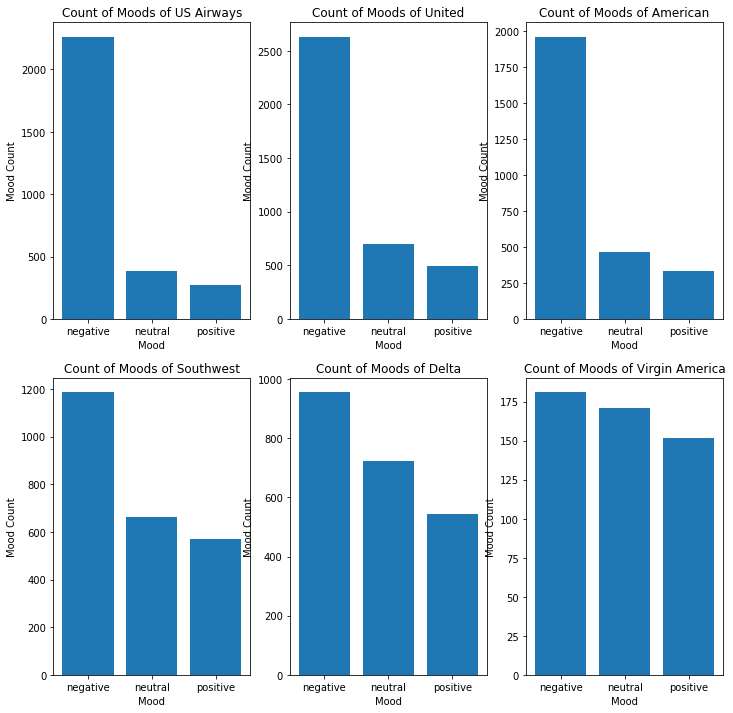

In [8]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
    
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the above plots we see that the first three airlines are always skewed toward negative moods, while the later three airlines the sentiment is more balanced.

In [9]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [10]:
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [11]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    plt.show()

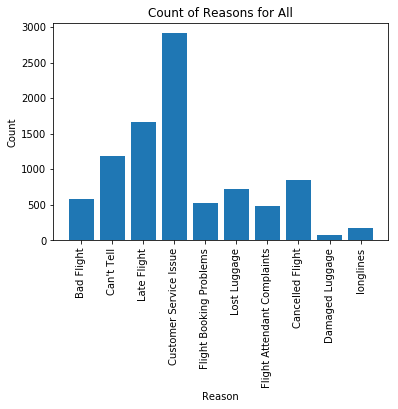

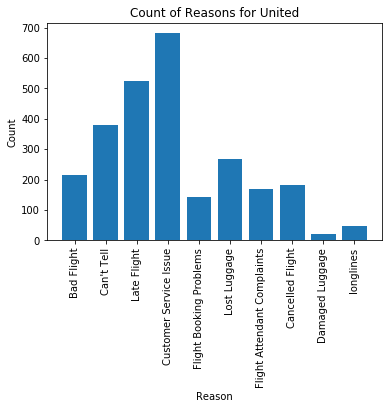

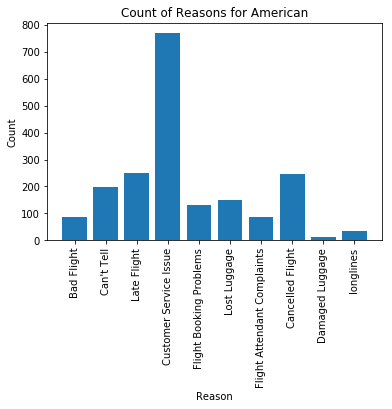

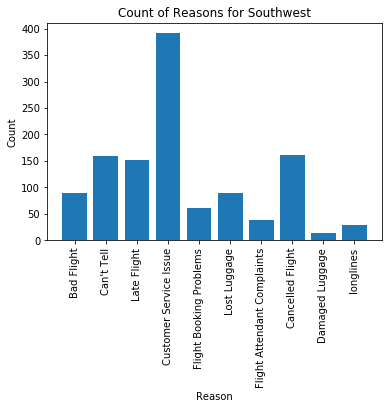

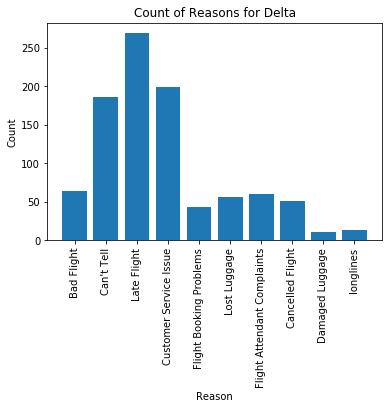

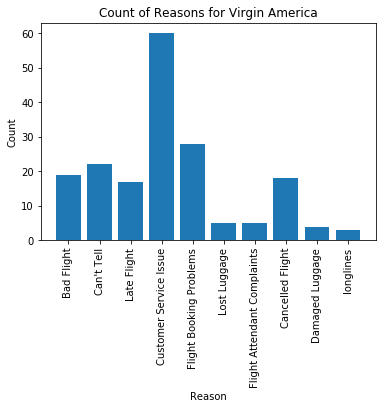

In [12]:
airline_names = ['All', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
for airline_name in airline_names:
    plot_reason(airline_name)

In [13]:
#!pip install wordcloud

bellow we plot the word cloud of each sentiment within a confidence range in order to get a sense of which words are most frequently used in each type of tweet.

In [14]:
from wordcloud import WordCloud,STOPWORDS

In [15]:
def plt_wordcloud(sentiment, confidence=-1):
    df=Tweet[Tweet['airline_sentiment']==sentiment]
    if confidence!=-1:
        df = df[df['airline_sentiment_confidence']<confidence]
    words = ' '.join(df['text'])
    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
    
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

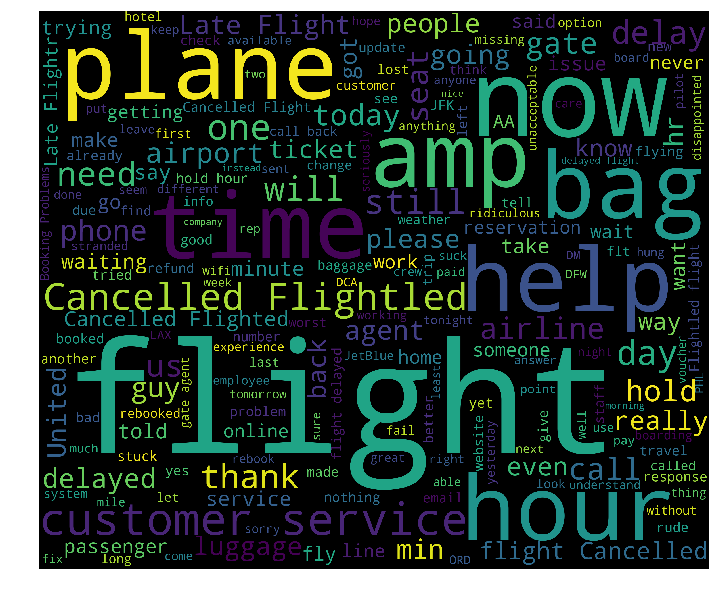

In [16]:
plt_wordcloud('negative')

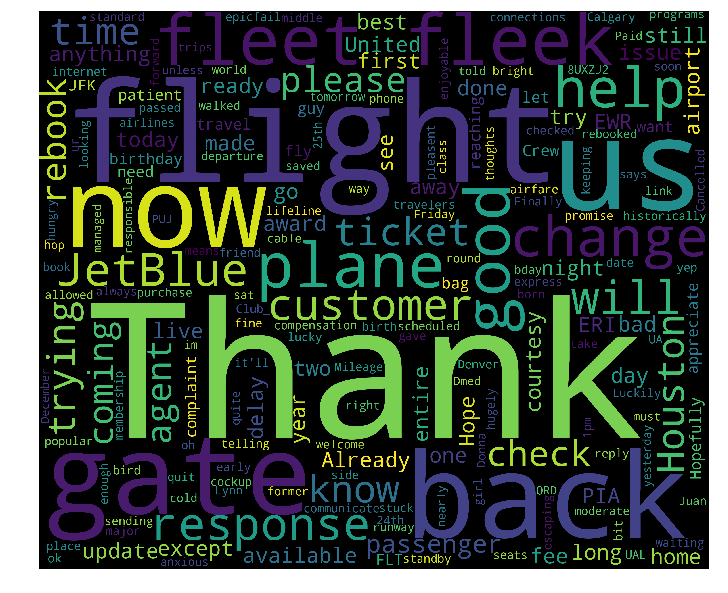

In [17]:
plt_wordcloud('negative',0.5)

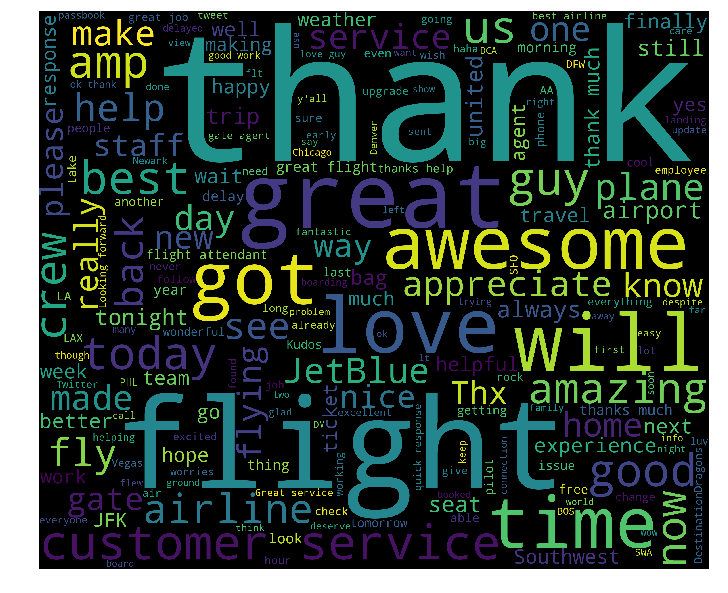

In [18]:
plt_wordcloud('positive')

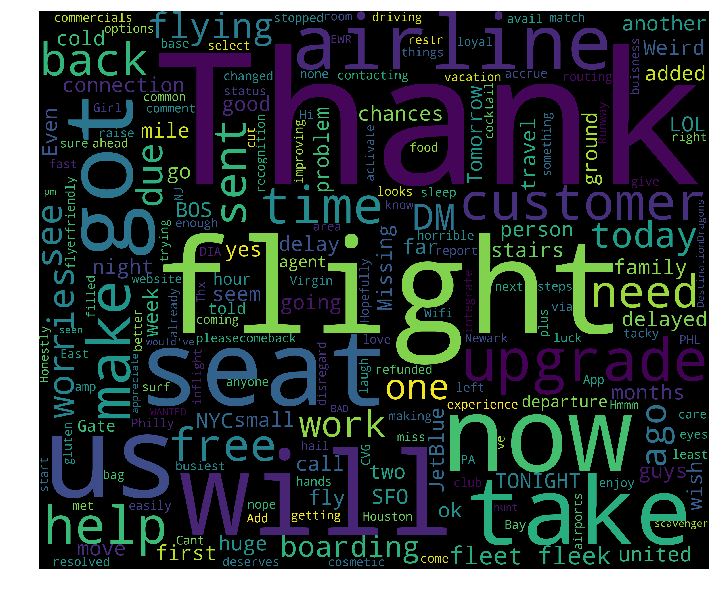

In [19]:
plt_wordcloud('positive',0.5)

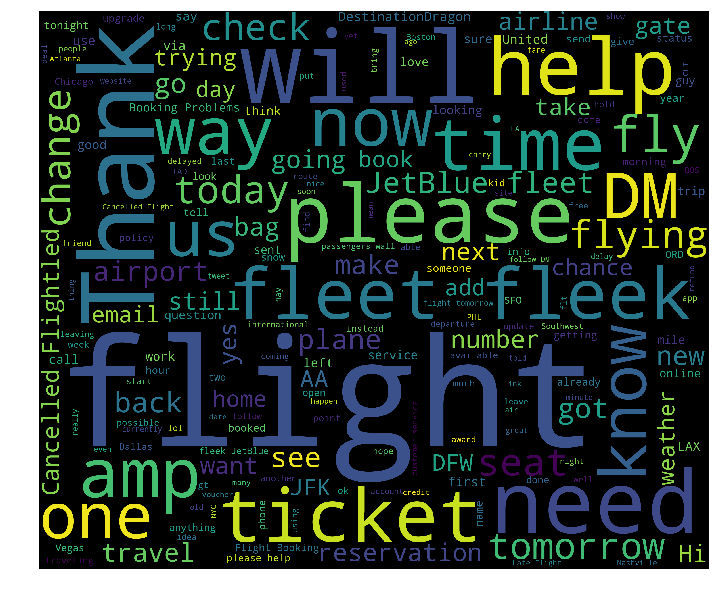

In [20]:
plt_wordcloud('neutral')

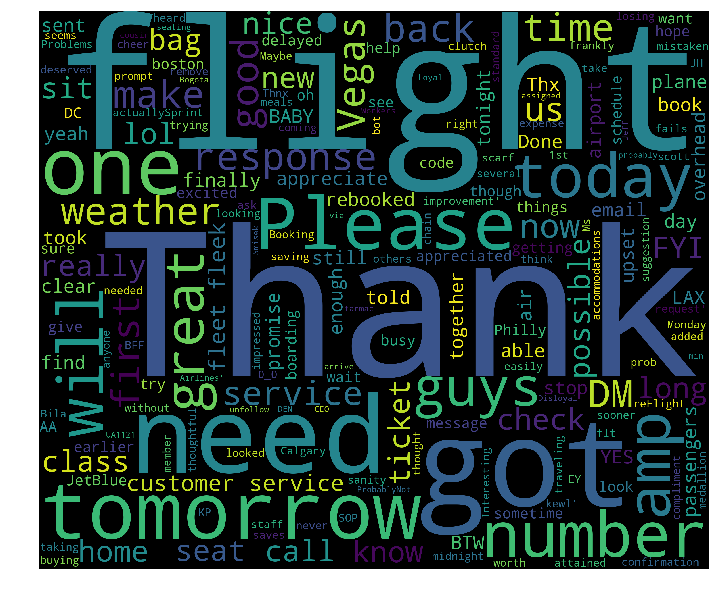

In [22]:
plt_wordcloud('neutral',0.5)

its not suprising to see that certain words (i.e. Thank) are very frequent in both negative and positive sentiment in confidence intervals less than 0.5 

# Preprocessing

In [23]:
def label(x):
    if x=='negative':
        return -1
    elif x=='positive':
        return 1
    return 0
Tweet['label']=Tweet['airline_sentiment'].apply(label)
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,label
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),-1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-1


In [24]:
df = pandas.DataFrame(Tweet[['label','text']])
df.head()

,label,text
0,0,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,-1,@VirginAmerica it's really aggressive to blast...
4,-1,@VirginAmerica and it's a really big bad thing...


In [25]:
df['is_valid'] = False
#shuffle
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,label,text,is_valid
0,-1,@AmericanAir that's not what I asked :)) I'm l...,False
1,-1,@JetBlue quick ? Why is a person traveling w ...,False
2,1,@USAirways big thank you to your ticketing ag...,False
3,-1,"@AmericanAir No, had already waited an hour fo...",False
4,-1,@united it was UA flight 1001! Now I'm current...,False


In [ ]:
df[-int(df.shape[0]*0.3):].is_valid = True 
df[-int(df.shape[0]*0.3):].tail()
df.to_csv('texts.csv')

C:\Users\zvil\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
train_df = df[df['is_valid']==False]
valid_df = df[df['is_valid']==True]

# Baseline Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_df['text'])
test_features=v.transform(valid_df['text'])

In [ ]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train_df['label'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train_df['label'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,valid_df['label'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    

C:\Users\zvil\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of LogisticRegressionis 0.6247723132969034
Accuracy of KNeighborsClassifieris 0.5357468123861566


C:\Users\zvil\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.6247723132969034
Accuracy of DecisionTreeClassifieris 0.6999089253187614


# ULMFit

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.text import * 

In [ ]:
path=""

### Getting your data ready for modeling

In [ ]:
for file in ['train_tok.npy', 'valid_tok.npy']:
    if os.path.exists(path+'tmp'+file): os.remove(path+'tmp'+file)

To get a [`DataBunch`](/basic_data.html#DataBunch) quickly, there are also several factory methods depending on how our data is structured. They are all detailed in [`text.data`](/text.data.html#text.data), here we'll use the method <code>from_csv</code> of the [`TextLMDataBunch`](/text.data.html#TextLMDataBunch) (to get the data ready for a language model) and [`TextClasDataBunch`](/text.data.html#TextClasDataBunch) (to get the data ready for a text classifier) classes.

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df=train_df, valid_df=valid_df, path=path)
# Classifier model data
data_clas = TextClasDataBunch.from_df(path=path, train_df=train_df, valid_df=valid_df, vocab=data_lm.train_ds.vocab, bs=32)

This does all the necessary preprocessing behind the scene. For the classifier, we also pass the vocabulary (mapping from ids to words) that we want to use: this is to ensure that `data_clas` will use the same dictionary as `data_lm`.

Since this step can be a bit time-consuming, it's best to save the result with:

In [ ]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')

This will create a 'tmp' directory where all the computed stuff will be stored. You can then reload those results with:

In [ ]:
data_lm = TextLMDataBunch.load(path=path,'data_lm_export.pkl')
data_clas = TextClasDataBunch.load(path=path,'data_clas_export.pkl', bs=16)

Note that you can load the data with different [`DataBunch`](/basic_data.html#DataBunch) parameters (batch size, `bptt`,...)

### Fine-tuning a language model

We can use the `data_lm` object we created earlier to fine-tune a pretrained language model. [fast.ai](http://www.fast.ai/) has an English model with an AWD-LSTM architecture available that we can download. We can create a learner object that will directly create a model, download the pretrained weights and be ready for fine-tuning.

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

Like a computer vision model, we can then unfreeze the model and fine-tune it.

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

To evaluate your language model, you can run the [`Learner.predict`](/basic_train.html#Learner.predict) method and specify the number of words you want it to guess.

In [ ]:
learn.predict("This is a review about", n_words=10)

It doesn't make much sense (we have a tiny vocabulary here and didn't train much on it) but note that it respects basic grammar (which comes from the pretrained model).

Finally we save the encoder to be able to use it for classification in the next section.

In [ ]:
learn.save_encoder('ft_enc')

### Building a classifier

We now use the `data_clas` object we created earlier to build a classifier with our fine-tuned encoder. The learner object can be done in a single line.

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [ ]:
data_clas.show_batch()

In [ ]:
learn.fit_one_cycle(1, 1e-2)

Again, we can unfreeze the model and fine-tune it.

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

Again, we can predict on a raw text by using the [`Learner.predict`](/basic_train.html#Learner.predict) method.

In [ ]:
learn.predict("This was a great flight!")

## Multi-task learning
Next we will test a hypothesis that multi task learning both the sentiment and the confidence of the sentiment (airline_sentiment_confidence) should imporve results.

What it is
>wikipedia: Multi-task learning (MTL) is a subfield of machine learning in which multiple learning tasks are solved at the same time, while exploiting commonalities and differences across tasks.

Why do it
>wikipedia: This can result in improved learning efficiency and prediction accuracy for the task-specific models, when compared to training the models separately.


Steps:
1. Load trained sentiment model and train on airline_sentiment_confidence
2. Re-train sentiment


In [ ]:
df_conf = pandas.DataFrame(Tweet[['airline_sentiment_confidence','text']])
df_conf.head()

In [ ]:
df_conf['is_valid'] = False
#shuffle
df_conf = df_conf.sample(frac=1).reset_index(drop=True)
df_conf.head()

In [ ]:
df_conf[-int(df.shape[0]*0.3):].is_valid = True 
df_conf[-int(df.shape[0]*0.3):].tail()
df_conf.to_csv('texts_conf.csv')

In [ ]:
train_conf_df = df[df['is_valid']==False]
valid_conf_df = df[df['is_valid']==True]

## Confidence Pretraining

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df=train_conf_df, valid_df=valid_conf_df, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df=train_conf_df, valid_df=valid_conf_df, vocab=data_lm.train_ds.vocab, bs=32)

data_lm.save()
data_clas.save()

In [ ]:
data_lm = TextLMDataBunch.load(path="")
data_clas = TextClasDataBunch.load(path="", bs=32)

In [ ]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load('sentiment0')
learn.predict("I am", n_words=30)

In [ ]:
data_clas.show_batch()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('pretrain_conf')

## Sentiment Training

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df=train_df, valid_df=valid_df, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df=train_df, valid_df=valid_df, vocab=data_lm.train_ds.vocab, bs=32)

data_lm.save()
data_clas.save()

In [ ]:
data_lm = TextLMDataBunch.load(path="")
data_clas = TextClasDataBunch.load(path="", bs=32)

In [ ]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load('pretrain_conf')

In [ ]:
data_clas.show_batch()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('sentiment1')

In [ ]:
we see that the above accuracy surpases the baseline.

# Credits

https://www.kaggle.com/jiashenliu/how-can-we-predict-the-sentiment-by-tweets

https://docs.fast.ai/text.html

https://medium.com/@zhang_yang/multi-task-deep-learning-experiment-using-fastai-pytorch-2b5e9d078069

https://forums.fast.ai/t/a-quick-and-easy-way-to-make-ulmfit-work-for-multi-label-problems/17222

https://forums.fast.ai/t/fastai-v1-and-multilabel-ulmfit/27694